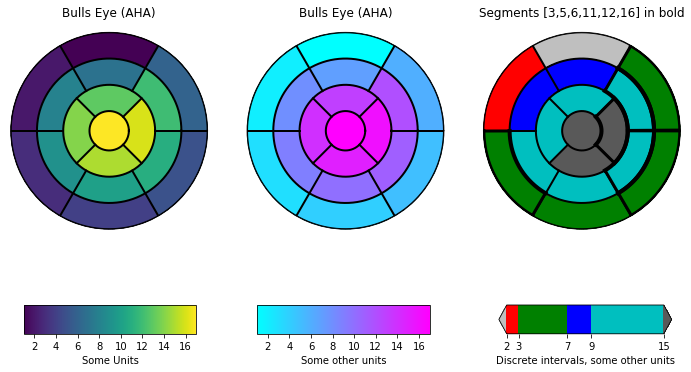

In [1]:
#Leftventricle Bulleye

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def bullseye_plot(ax, data, segBold=None, cmap=None, norm=None):
    """
    Bullseye representation for the left ventricle.

    Parameters
    ----------
    ax : axes
    data : list of int and float
        The intensity values for each of the 17 segments
    segBold: list of int, optional
        A list with the segments to highlight
    cmap : ColorMap or None, optional
        Optional argument to set the desired colormap
    norm : Normalize or None, optional
        Optional argument to normalize data into the [0.0, 1.0] range


    Notes
    -----
    This function create the 17 segment model for the left ventricle according
    to the American Heart Association (AHA) [1]_

    References
    ----------
    .. [1] M. D. Cerqueira, N. J. Weissman, V. Dilsizian, A. K. Jacobs,
        S. Kaul, W. K. Laskey, D. J. Pennell, J. A. Rumberger, T. Ryan,
        and M. S. Verani, "Standardized myocardial segmentation and
        nomenclature for tomographic imaging of the heart",
        Circulation, vol. 105, no. 4, pp. 539-542, 2002.
    """
    if segBold is None:
        segBold = []

    linewidth = 2
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2 * np.pi, 768)
    r = np.linspace(0.2, 1, 4)

    # Create the bound for the segment 17
    for i in range(r.shape[0]):
        ax.plot(theta, np.repeat(r[i], theta.shape), '-k', lw=linewidth)

    # Create the bounds for the segments  1-12
    for i in range(6):
        theta_i = np.deg2rad(i * 60)
        ax.plot([theta_i, theta_i], [r[1], 1], '-k', lw=linewidth)

    # Create the bounds for the segments 13-16
    for i in range(4):
        theta_i = np.deg2rad(i * 90 - 45)
        ax.plot([theta_i, theta_i], [r[0], r[1]], '-k', lw=linewidth)

    # Fill the segments 1-6
    r0 = r[2:4]
    r0 = np.repeat(r0[:, np.newaxis], 128, axis=1).T
    for i in range(6):
        # First segment start at 60 degrees
        theta0 = theta[i * 128:i * 128 + 128] + np.deg2rad(60)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((128, 2)) * data[i]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i + 1 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)
            ax.plot(theta0[0], [r[2], r[3]], '-k', lw=linewidth + 1)
            ax.plot(theta0[-1], [r[2], r[3]], '-k', lw=linewidth + 1)

    # Fill the segments 7-12
    r0 = r[1:3]
    r0 = np.repeat(r0[:, np.newaxis], 128, axis=1).T
    for i in range(6):
        # First segment start at 60 degrees
        theta0 = theta[i * 128:i * 128 + 128] + np.deg2rad(60)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((128, 2)) * data[i + 6]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i + 7 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)
            ax.plot(theta0[0], [r[1], r[2]], '-k', lw=linewidth + 1)
            ax.plot(theta0[-1], [r[1], r[2]], '-k', lw=linewidth + 1)

    # Fill the segments 13-16
    r0 = r[0:2]
    r0 = np.repeat(r0[:, np.newaxis], 192, axis=1).T
    for i in range(4):
        # First segment start at 45 degrees
        theta0 = theta[i * 192:i * 192 + 192] + np.deg2rad(45)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((192, 2)) * data[i + 12]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i + 13 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)
            ax.plot(theta0[0], [r[0], r[1]], '-k', lw=linewidth + 1)
            ax.plot(theta0[-1], [r[0], r[1]], '-k', lw=linewidth + 1)

    # Fill the segments 17
    if data.size == 17:
        r0 = np.array([0, r[0]])
        r0 = np.repeat(r0[:, np.newaxis], theta.size, axis=1).T
        theta0 = np.repeat(theta[:, np.newaxis], 2, axis=1)
        z = np.ones((theta.size, 2)) * data[16]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if 17 in segBold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)

    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])


# Create the fake data
data = np.array(range(17)) + 1


# Make a figure and axes with dimensions as desired.
fig, ax = plt.subplots(figsize=(12, 8), nrows=1, ncols=3,
                       subplot_kw=dict(projection='polar'))
fig.canvas.set_window_title('Left Ventricle Bulls Eyes (AHA)')

# Create the axis for the colorbars
axl = fig.add_axes([0.14, 0.15, 0.2, 0.05])
axl2 = fig.add_axes([0.41, 0.15, 0.2, 0.05])
axl3 = fig.add_axes([0.69, 0.15, 0.2, 0.05])


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=1, vmax=17)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(axl, cmap=cmap, norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap2 = mpl.cm.cool
norm2 = mpl.colors.Normalize(vmin=1, vmax=17)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb2 = mpl.colorbar.ColorbarBase(axl2, cmap=cmap2, norm=norm2,
                                orientation='horizontal')
cb2.set_label('Some other units')


# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap3 = mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
cmap3.set_over('0.35')
cmap3.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [2, 3, 7, 9, 15]
norm3 = mpl.colors.BoundaryNorm(bounds, cmap3.N)
cb3 = mpl.colorbar.ColorbarBase(axl3, cmap=cmap3, norm=norm3,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                boundaries=[0] + bounds + [18],
                                extend='both',
                                ticks=bounds,  # optional
                                spacing='proportional',
                                orientation='horizontal')
cb3.set_label('Discrete intervals, some other units')


# Create the 17 segment model
bullseye_plot(ax[0], data, cmap=cmap, norm=norm)
ax[0].set_title('Bulls Eye (AHA)')

bullseye_plot(ax[1], data, cmap=cmap2, norm=norm2)
ax[1].set_title('Bulls Eye (AHA)')

bullseye_plot(ax[2], data, segBold=[3, 5, 6, 11, 12, 16],
              cmap=cmap3, norm=norm3)
ax[2].set_title('Segments [3,5,6,11,12,16] in bold')

plt.show()

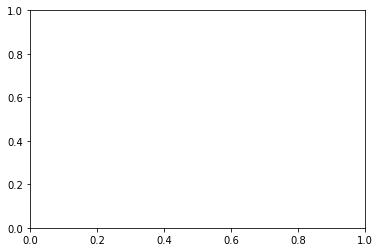

107.3 frames per second


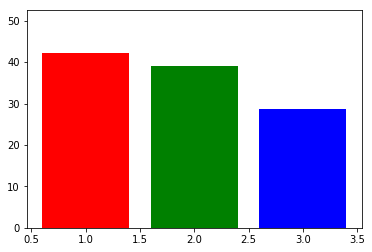

In [6]:
#System Monitor

import time
import matplotlib.pyplot as plt
import numpy as np


def get_memory(t):
    "Simulate a function that returns system memory"
    return 100 * (0.5 + 0.5 * np.sin(0.5 * np.pi * t))


def get_cpu(t):
    "Simulate a function that returns cpu usage"
    return 100 * (0.5 + 0.5 * np.sin(0.2 * np.pi * (t - 0.25)))


def get_net(t):
    "Simulate a function that returns network bandwidth"
    return 100 * (0.5 + 0.5 * np.sin(0.7 * np.pi * (t - 0.1)))


def get_stats(t):
    return get_memory(t), get_cpu(t), get_net(t)

fig, ax = plt.subplots()
ind = np.arange(1, 4)

# show the figure, but do not block
plt.show(block=False)


pm, pc, pn = plt.bar(ind, get_stats(0))
pm.set_facecolor('r')
pc.set_facecolor('g')
pn.set_facecolor('b')
ax.set_xticks(ind)
ax.set_xticklabels(['Memory', 'CPU', 'Bandwidth'])
ax.set_ylim([0, 100])
ax.set_ylabel('Percent usage')
ax.set_title('System Monitor')

start = time.time()
for i in range(200):  # run for a little while
    m, c, n = get_stats(i / 10.0)

    # update the animated artists
    pm.set_height(m)
    pc.set_height(c)
    pn.set_height(n)

    # ask the canvas to re-draw itself the next time it
    # has a chance.
    # For most of the GUI backends this adds an event to the queue
    # of the GUI frameworks event loop.
    fig.canvas.draw_idle()
    try:
        # make sure that the GUI framework has a chance to run its event loop
        # and clear any GUI events.  This needs to be in a try/except block
        # because the default implementation of this method is to raise
        # NotImplementedError
        fig.canvas.flush_events()
    except NotImplementedError:
        pass

stop = time.time()
print("{fps:.1f} frames per second".format(fps=200 / (stop - start)))

plt.show()

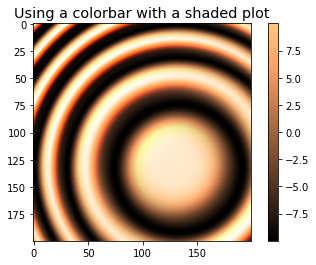

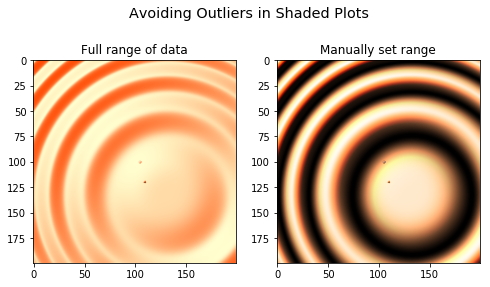

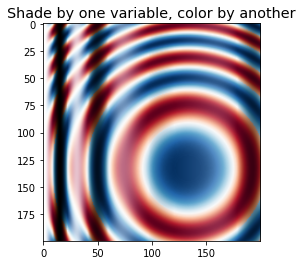

In [7]:
#Hillshading

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize


def display_colorbar():
    """Display a correct numeric colorbar for a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    cmap = plt.cm.copper
    ls = LightSource(315, 45)
    rgb = ls.shade(z, cmap)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')

    # Use a proxy artist for the colorbar...
    im = ax.imshow(z, cmap=cmap)
    im.remove()
    fig.colorbar(im)

    ax.set_title('Using a colorbar with a shaded plot', size='x-large')


def avoid_outliers():
    """Use a custom norm to control the displayed z-range of a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    # Add some outliers...
    z[100, 105] = 2000
    z[120, 110] = -9000

    ls = LightSource(315, 45)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4.5))

    rgb = ls.shade(z, plt.cm.copper)
    ax1.imshow(rgb, interpolation='bilinear')
    ax1.set_title('Full range of data')

    rgb = ls.shade(z, plt.cm.copper, vmin=-10, vmax=10)
    ax2.imshow(rgb, interpolation='bilinear')
    ax2.set_title('Manually set range')

    fig.suptitle('Avoiding Outliers in Shaded Plots', size='x-large')


def shade_other_data():
    """Demonstrates displaying different variables through shade and color."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z1 = np.sin(x**2)  # Data to hillshade
    z2 = np.cos(x**2 + y**2)  # Data to color

    norm = Normalize(z2.min(), z2.max())
    cmap = plt.cm.RdBu

    ls = LightSource(315, 45)
    rgb = ls.shade_rgb(cmap(norm(z2)), z1)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')
    ax.set_title('Shade by one variable, color by another', size='x-large')

display_colorbar()
avoid_outliers()
shade_other_data()
plt.show()

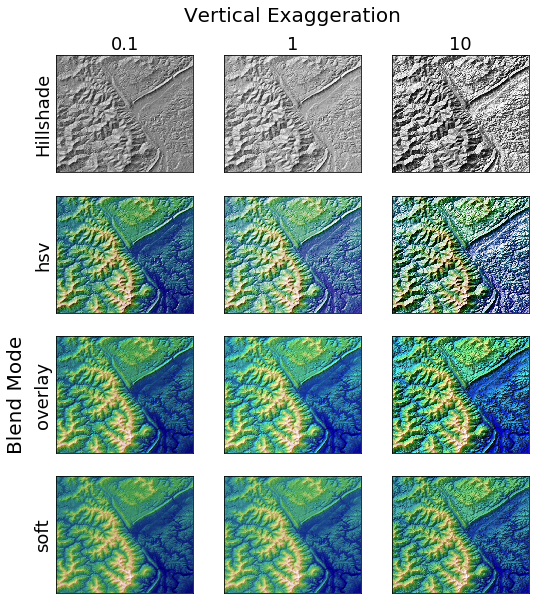

In [8]:
#Topographic hillshading

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource


with np.load(get_sample_data('jacksboro_fault_dem.npz')) as dem:
    z = dem['elevation']

    #-- Optional dx and dy for accurate vertical exaggeration ----------------
    # If you need topographically accurate vertical exaggeration, or you don't
    # want to guess at what *vert_exag* should be, you'll need to specify the
    # cellsize of the grid (i.e. the *dx* and *dy* parameters).  Otherwise, any
    # *vert_exag* value you specify will be relative to the grid spacing of
    # your input data (in other words, *dx* and *dy* default to 1.0, and
    # *vert_exag* is calculated relative to those parameters).  Similarly, *dx*
    # and *dy* are assumed to be in the same units as your input z-values.
    # Therefore, we'll need to convert the given dx and dy from decimal degrees
    # to meters.
    dx, dy = dem['dx'], dem['dy']
    dy = 111200 * dy
    dx = 111200 * dx * np.cos(np.radians(dem['ymin']))
    #-------------------------------------------------------------------------

# Shade from the northwest, with the sun 45 degrees from horizontal
ls = LightSource(azdeg=315, altdeg=45)
cmap = plt.cm.gist_earth

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 9))
plt.setp(axes.flat, xticks=[], yticks=[])

# Vary vertical exaggeration and blend mode and plot all combinations
for col, ve in zip(axes.T, [0.1, 1, 10]):
    # Show the hillshade intensity image in the first row
    col[0].imshow(ls.hillshade(z, vert_exag=ve, dx=dx, dy=dy), cmap='gray')

    # Place hillshaded plots with different blend modes in the rest of the rows
    for ax, mode in zip(col[1:], ['hsv', 'overlay', 'soft']):
        rgb = ls.shade(z, cmap=cmap, blend_mode=mode,
                       vert_exag=ve, dx=dx, dy=dy)
        ax.imshow(rgb)

# Label rows and columns
for ax, ve in zip(axes[0], [0.1, 1, 10]):
    ax.set_title('{0}'.format(ve), size=18)
for ax, mode in zip(axes[:, 0], ['Hillshade', 'hsv', 'overlay', 'soft']):
    ax.set_ylabel(mode, size=18)

# Group labels...
axes[0, 1].annotate('Vertical Exaggeration', (0.5, 1), xytext=(0, 30),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='center', va='bottom', size=20)
axes[2, 0].annotate('Blend Mode', (0, 0.5), xytext=(-30, 0),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='right', va='center', size=20, rotation=90)
fig.subplots_adjust(bottom=0.05, right=0.95)

plt.show()

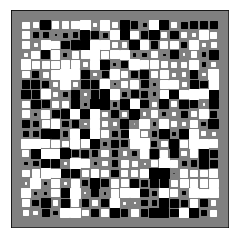

In [9]:
#Hinton diagrams

import numpy as np
import matplotlib.pyplot as plt


def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


if __name__ == '__main__':
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    hinton(np.random.rand(20, 20) - 0.5)
    plt.show()

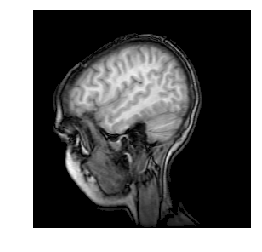

In [10]:
#MRI

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm
import numpy as np


# Data are 256x256 16 bit integers
with cbook.get_sample_data('s1045.ima.gz') as dfile:
    im = np.fromstring(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots(num="MRI_demo")
ax.imshow(im, cmap=cm.gray)
ax.axis('off')

plt.show()

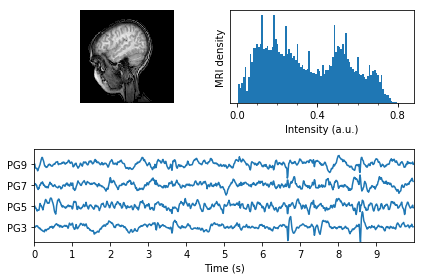

In [11]:
#MRI With EEG

from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm

from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

fig = plt.figure("MRI_with_EEG")

# Load the MRI data (256x256 16 bit integers)
with cbook.get_sample_data('s1045.ima.gz') as dfile:
    im = np.fromstring(dfile.read(), np.uint16).reshape((256, 256))

# Plot the MRI image
ax0 = fig.add_subplot(2, 2, 1)
ax0.imshow(im, cmap=cm.gray)
ax0.axis('off')

# Plot the histogram of MRI intensity
ax1 = fig.add_subplot(2, 2, 2)
im = np.ravel(im)
im = im[np.nonzero(im)]  # Ignore the background
im = im / (2**16 - 1)  # Normalize
ax1.hist(im, bins=100)
ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax1.minorticks_on()
ax1.set_yticks([])
ax1.set_xlabel('Intensity (a.u.)')
ax1.set_ylabel('MRI density')

# Load the EEG data
numSamples, numRows = 800, 4
with cbook.get_sample_data('eeg.dat') as eegfile:
    data = np.fromfile(eegfile, dtype=float)
data.shape = (numSamples, numRows)
t = 10.0 * np.arange(numSamples) / numSamples

# Plot the EEG
ticklocs = []
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(10))
dmin = data.min()
dmax = data.max()
dr = (dmax - dmin) * 0.7  # Crowd them a bit.
y0 = dmin
y1 = (numRows - 1) * dr + dmax
ax2.set_ylim(y0, y1)

segs = []
for i in range(numRows):
    segs.append(np.hstack((t[:, np.newaxis], data[:, i, np.newaxis])))
    ticklocs.append(i * dr)

offsets = np.zeros((numRows, 2), dtype=float)
offsets[:, 1] = ticklocs

lines = LineCollection(segs, offsets=offsets, transOffset=None)
ax2.add_collection(lines)

# Set the yticks to use axes coordinates on the y axis
ax2.set_yticks(ticklocs)
ax2.set_yticklabels(['PG3', 'PG5', 'PG7', 'PG9'])

ax2.set_xlabel('Time (s)')


plt.tight_layout()
plt.show()

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


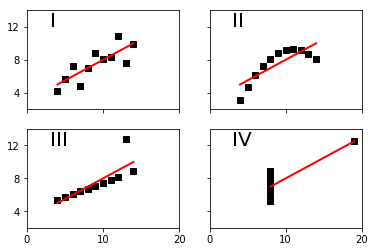

In [12]:
#Anscombe’s Quartet

from __future__ import print_function
"""
Edward Tufte uses this example from Anscombe to show 4 datasets of x
and y that have the same mean, standard deviation, and regression
line, but which are qualitatively different.

matplotlib fun for a rainy day
"""

import matplotlib.pyplot as plt
import numpy as np

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])


def fit(x):
    return 3 + 0.5 * x


xfit = np.array([np.min(x), np.max(x)])

plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticks=(0, 10, 20), xticklabels=[],
         yticks=(4, 8, 12), yticklabels=[], )
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.min(x4), np.max(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()